# Task 1 

### Design a quantum circuit that considers as input the following vector of integers numbers:  [1,5,7,10]


#### 1. Python imports

In [129]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from qiskit import QuantumRegister, QuantumCircuit, BasicAer, ClassicalRegister, execute, assemble
from qiskit import IBMQ, BasicAer, Aer
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import plot_histogram

from qiskit.utils import QuantumInstance, algorithm_globals

#### 2. Consider the vector [1,5,7,10] and pass integer values to binary numbers as [001,101,100,010]

In [183]:
# creating an empty list
vec = [1,5,7,10] 

# Finding the number of bits in length for each element
m = len(format(max(vec), "b"))
size = m

# create a list to store the binary numbers 
bin_vec = []
for i in range(0,len(vec)):
    l = np.binary_repr(vec[i], width=size)
    bin_vec.append(l)
bin_vec

['0001', '0101', '0111', '1010']

#### 3. Defining the Circuit

In [189]:
# defining the function to find the logical ouput through the circuit
# The circuit 'qc' operates uses CNOT Gate which acts as a XOR gate between two consecutive qubits
# Only if the two consecutive qubits are '0' and '1', the measurment will be High
def oracle(size, no):
    ran = size-1
    
    # Creating a Quantum Circuit
    q = QuantumRegister(size)               # No. of Qubits  = Length of the bitstring 
    c = ClassicalRegister(int(size/2))      # Only half the no.of qubits required for measurment
    qc = QuantumCircuit(q,c)
    
    # Apply X-Gate where the value is '1' in the bitstring
    for i in range(size):
        if(no[i]=='1'):
            qc.x(q[i])
            
    # Apply CNOT Gate to check if the consecutive bits are '0' and '1'     
    for i in range(0,ran,2):
        qc.cx(q[i], q[i+1])
        
    # measure the target bits 
    j=0
    for i in range(1,ran+1,2):
        qc.measure(q[i], c[j])
        j+=1
    return qc

In [199]:
# Iteratively pass each value in [1,5,7,10] and run the circuit
for i in range(len(vec)):
    # call the function to exectute the circuit
    quant = oracle(size, bin_vec[i])              # Pass arguments as the length of the bitstring and one bitstring at a time 
    backend = Aer.get_backend('qasm_simulator')
    job = execute(quant, backend, shots=1000)
    result = job.result()
    count = result.get_counts()
    print(count) 

{'10': 1000}
{'11': 1000}
{'01': 1000}
{'11': 1000}


#### 4. Returning Indices of the Numbers satisfying the condition

In [200]:
# Return the indices of the number's bitstring which satisfys the condition 
indices = []
for i in range(len(vec)):
    quant = oracle(size, bin_vec[i])
    aer_sim = Aer.get_backend('aer_simulator')
    qobj = assemble(quant, shots=10)
    job = aer_sim.run(qobj, memory=True)
    samples = job.result().get_memory()
    
    # According to the XOR Logic if the result consists of only 1's, we consider that result
    # Then it a valid output where binary representation is such that two adjacent bits are different
    if '0' not in samples[0]:
        indices.append(i)
indices

[1, 3]

#### 5. Final Superposition State

In [202]:
n = len(bin(max(indices))[2:])

#Statevector of initial superposition state
initial_sv = np.zeros(shape = (2**n))

for i in indices:
    initial_sv[i] = 1/np.sqrt(2)

#Initialize Quantum Circuit
initial_state = QuantumCircuit(n)
initial_state.initialize( initial_sv, range(n) )
initial_state.draw()

┌──────────────────────────────────┐
q_0: ┤0                                 ├
     │  Initialize(0,0.70711,0,0.70711) │
q_1: ┤1                                 ├
     └──────────────────────────────────┘

{'11': 499, '10': 501}


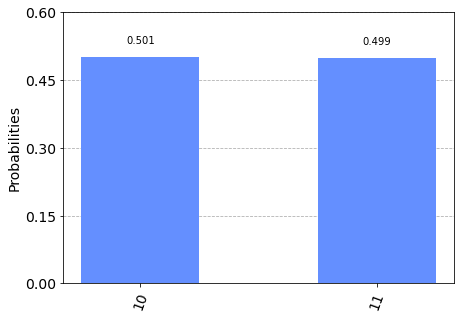

In [203]:
# Histogram for the result of the superposition state 1/sqrt(2) * (|01> + |11>) of the indixces [1,3] 
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.x(q[1])
qc.measure_all()
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count = result.get_counts()
print(count)
plot_histogram(count)

In [204]:
# Final Output State
indices = [np.binary_repr(int(i)) for i in indices]
max_len = max(np.vectorize(len)(indices))
if max_len == 1:
    max_len = 2
indices = np.array([str(0)*(max_len-len(i))+i for i in indices])

print("Final State = [1/sqrt({})]*{}".format(len(indices), indices,))

Final State = [1/sqrt(2)]*['01' '11']


## Bonus Task

#### 1. Input any integer vector and pass integer values to binary numbers in a list

In [205]:
# creating an empty list
vec = [] 

# number of elements as input
n = int(input("Enter number of elements : "))

# iterating till the range
for i in range(0, n):
    ele = int(input())
    vec.append(ele)
    
# To find m bits in length for each element
m = len(format(max(vec), "b"))
size = m

# create a list to store the binary numbers 
bin_vec = []
for i in range(0,len(vec)):
    l = np.binary_repr(vec[i], width=size)
    bin_vec.append(l)
bin_vec

Enter number of elements : 4
21
10
26
28


['10101', '01010', '11010', '11100']

#### 2. Defining the Circuit

In [208]:
# defining the function to find the logical ouput through the circuit
# The circuit 'qc' operates uses CNOT Gate which acts as a XOR gate between two consecutive qubits
# Only if the two consecutive qubits are '0' and '1', the measurment will be High
def oracle(size, no):
    ran = size-1
    
    # Creating a Quantum Circuit
    q = QuantumRegister(size)               # No. of Qubits  = Length of the bitstring 
    c = ClassicalRegister(int(size/2))      # Only half the no.of qubits required for measurment
    qc = QuantumCircuit(q,c)
    
    # Apply X-Gate where the value is '1' in the bitstring
    for i in range(size):
        if(no[i]=='1'):
            qc.x(q[i])
            
    # Apply CNOT Gate to check if the consecutive bits are '0' and '1'     
    for i in range(0,ran,2):
        qc.cx(q[i], q[i+1])
        
    # measure the target bits 
    j=0
    for i in range(1,ran+1,2):
        qc.measure(q[i], c[j])
        j+=1
    return qc

In [209]:
# defining the function to find the logical ouput through the circuit
# The circuit 'qc' operates uses CNOT Gate which acts as a XOR gate between two consecutive qubits
# Only if the two consecutive qubits are '0' and '1', the measurment will be High
def oracle(size, no):
    num_qubits = size
    
    # Check if the no. of bits in the bitstring are even or odd
    if(size%2==0):          
        ran = num_qubits-1   
        num_c = int(size/2)          # Only half the no.of qubits required for measurment    
    else:
        num_c = int(size/2)+1        # Only half the no.of qubits required for measurment and one extra to measure the last bit value
        ran = num_qubits-2
        
    # Creating a Quantum Circuit
    q = QuantumRegister(size)        # No. of Qubits  = Length of the bitstring 
    c = ClassicalRegister(num_c)
    qc = QuantumCircuit(q,c) 
    
    # Apply X-Gate where the value is '1' in the bitstring
    for i in range(size):
        if(no[i]=='1'):
            qc.x(q[i])
            
    # Apply CNOT Gate to check if the consecutive bits are '0' and '1'            
    for i in range(0,ran,2):
        qc.cx(q[i], q[i+1])
        
    # measure the target bits    
    j=0
    for i in range(1,ran+1,2):
        qc.measure(q[i], c[j])
        j+=1
        
    # If the no. of bits are odd
    # Check if the Last bit value is same as the First bit value
    # Check if the Last bit value is '0'
    
    # If Both the conditions are satisfied - then flip the Last Bit value to '1',
    # Now the value of the result for this bit string includes all 1's
    if(size%2==1):
        if(no[0]==no[num_qubits-1] and no[num_qubits-1]=='0'):
            qc.x(q[num_qubits-1])
        qc.measure(q[num_qubits-1],c[j])          # Measure the last bit in the bitstring
    return qc

In [210]:
# Iteratively pass each value in [1,5,7,10] and run the circuit
for i in range(n):
    # call the function to exectute the circuit
    quant = oracle(size, bin_vec[i])              # Pass arguments as the length of the bitstring and one bitstring at a time 
    backend = Aer.get_backend('qasm_simulator')
    job = execute(quant, backend, shots=1000)
    result = job.result()
    count = result.get_counts()
    print(count) 

{'111': 1000}
{'111': 1000}
{'010': 1000}
{'010': 1000}


#### 3. Returning Indices of the Numbers satisfying the condition

In [211]:
# Return the indices of the number's bitstring which satisfys the condition 
indices = []
for i in range(n):
    quant = oracle(size, bin_vec[i])
    aer_sim = Aer.get_backend('aer_simulator')
    qobj = assemble(quant, shots=10)
    job = aer_sim.run(qobj, memory=True)
    samples = job.result().get_memory()
    
    # According to the XOR Logic if the result consists of only 1's, we consider that result
    # Then it a valid output where binary representation is such that two adjacent bits are different
    if '0' not in samples[0]:
        indices.append(i)
indices

[0, 1]

#### 5. Final Superposition State

In [216]:
# Final Output State
indices = [np.binary_repr(int(i)) for i in indices]
max_len = max(np.vectorize(len)(indices))
if max_len == 1:
    max_len = 2
indices = np.array([str(0)*(max_len-len(i))+i for i in indices])

print("Final State = [1/sqrt({})]*{}".format(len(indices), indices,))

Final State = [1/sqrt(2)]*['00' '01']
